## Lineare Regression mit Python

#### Beispiel:
Wir nehmen an, dass wir den Druck $p$ eines idealen Gases in einem festen Behälter (Volumen $V$) in abhängigkeit der Temperatur $T$ (in Celsius) gemessen haben. Nach dem idealen Gasgesetz ($pV=nR(T+T_0$) sollte hier ein linearer Zusammenhang bestehen, aus dem wir den absoluten Nullpunkt $T_0$ (in Celsius) bestimmen können, sofern $V, n, R$ bekannt sind:
$$p(T) = \frac{nR}{V}(T +  T_0)$$
oder
$ p(t) = aT+b$, mit $a=\frac{nR}{V}$ und $b = \frac{nR}{V}T_0$


In [14]:
import numpy as np   # Numerische Operationen (Wir benötigen: linspace, random)
# Anzahl Messpunkte N:
N=15
# Temperaturen T, von -20 bis 100  (N Werte)
T = np.linspace(-20,100,N) 
T0=273.15
# Druck p mit normalverteiltem Standardabweichung ("Fehler") Dp=10.   (N Werte)
Dp=10
p = 2.1*(T + np.random.normal(T0,Dp,N))

Grafik der Daten

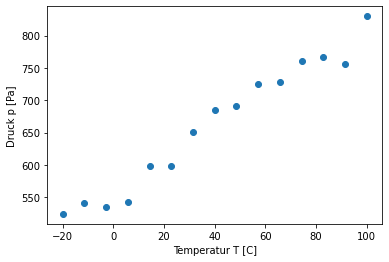

In [16]:
import matplotlib.pyplot as plt # for plotting
plt.xlabel('Temperatur T [C]')
plt.ylabel('Druck p [Pa]')
#plt.axis([-300, 150, 0, 900])
plt.plot(T,p,'o')

Besser und im Praktikum erwünscht ist eine Darstellung mit Indikation der Fehler:
### Graphik mit Fehlerbalken

<ErrorbarContainer object of 3 artists>

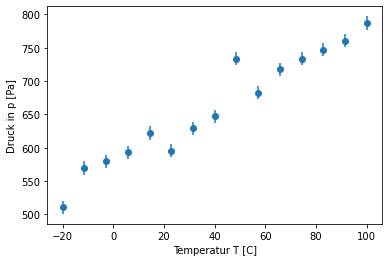

In [3]:
plt.xlabel('Temperatur T [C]')
plt.ylabel('Druck in p [Pa]')
plt.errorbar(T,p,yerr=Dp,fmt='o')

### Linear Regression 
#### Unter Benutzung der *linregress* Funktion in *Scipy.stats*

In [4]:
# Laden von linregress
from scipy.stats import linregress
a, b, r, P, Delta_a= linregress(T,p) 
# a: Steigung, b: Achsenabschnitt, 
# r: (lineare) Korrelation von t und p, 
# P: "p-value", Delta_a= Standardabweichung  ("Fehler) von a
#print(a,b,Delta_a)
print("Steigung a = {:5.2} +/- {:5.2}, Achsenabschnitt b = {:5.2f} +/- ??".format(a, Delta_a, b))

Steigung a =   2.1 +/-  0.15, Achsenabschnitt b = 576.53 +/- ??


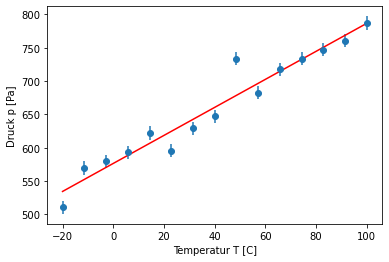

In [5]:
plt.errorbar(T,p,yerr=Dp,fmt='o')
plt.xlabel('Temperatur T [C]')
plt.ylabel('Druck p [Pa]')
plt.plot(T, a*T+b,'r')

Leider wird bei *scipy.stats.linregress* die Standardabweichung des Achsenabschnitts nicht berechnent. Dies gelingt mit (*scipy.optimize.curve_fit*

#### Linear Regression unter Benutzung von *curve_fit* in *Scipy.optimize*

In [6]:
from scipy.optimize import curve_fit

Wir definieren die lineare Funktion mit Parametern *a* und *b* deren optimalen Werte wir anschliessend mit *curve_fit* bestimmen lassen:  

In [7]:
def linear_f(x,a,b):
    '''x: independent variable
       a: slope
       b: intersect '''
    return a*x+b

In [8]:
p_opt, p_cov = curve_fit(linear_f,T,p)  # Find optimal parameters a, b (in p_opt = [a, b]) and their covariance matrix (std^2)
# Returns:
#     optimal parameters in p_opt
#     covariance matrix of these parameters in p_cov
print("p_opt = [a, b] = ",p_opt)
print("p_cov = ",p_cov)

p_opt = [a, b] =  [  2.10278173 576.53118922]
p_cov =  [[ 2.14161292e-02 -8.56645175e-01]
 [-8.56645175e-01  6.36364984e+01]]


In [9]:
a = p_opt[0] # slope
Da = np.sqrt(p_cov[0,0]) # std slope (error)
b = p_opt[1] #  intercept
Db = np.sqrt(p_cov[1,1])

In [10]:
#print("Steigung a = {:5.2f} $\pm$ {:5.2}".format(p_opt[0],p_cov[0,0]))
print("Steigung a = {:5.2f} +/- {:5.2}".format(a, Da))
print("Achsenabschnitt b = {:5.2f} +/- {:5.2f}".format(p_opt[1], p_cov[1,1]))

Steigung a =  2.10 +/-  0.15
Achsenabschnitt b = 576.53 +/- 63.64


<function matplotlib.pyplot.show(close=None, block=None)>

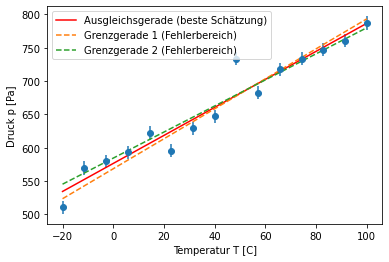

In [11]:
plt.errorbar(T,p,yerr=Dp,fmt='o')
plt.plot(T, a*T+b,'r', label="Ausgleichsgerade (beste Schätzung)")
plt.xlabel('Temperatur T [C]')
plt.ylabel('Druck p [Pa]')
plt.plot(T,(a+Da)*T+b-Db,'--', label="Grenzgerade 1 (Fehlerbereich)")
plt.plot(T,(a-Da)*T+b+Db,'--', label="Grenzgerade 2 (Fehlerbereich)")
plt.legend(loc='upper left')
plt.show

Am absoluten Nullpunkt $T_0$ ist $p=0$ also gilt folgt aus 

$$ p(t) = aT+b$$ 
$$T_0 = -b/a$$

Um $T_0$ mit Genauigkeit zu bestimmen bentzen wir das *Uncertainties* Paket

In [12]:
from uncertainties import ufloat
a_u = ufloat(a,Da)
b_u = ufloat(b,Db)
T_0 = -b_u/a_u
print("Berechneter absoluter Nullpunkt T_0 = {:P} [C]".format(T_0))

Berechneter absoluter Nullpunkt T_0 = -274±19 [C]


Warum dieser Wert recht ungenau ist illustriert die folgende Graphik

<function matplotlib.pyplot.show(close=None, block=None)>

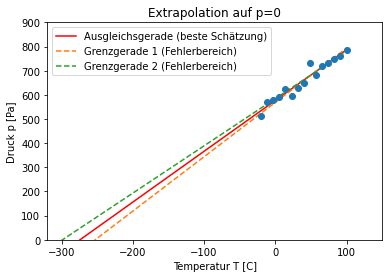

In [13]:
T1 = np.append(-320,T)
plt.errorbar(T,p,yerr=Dp,fmt='o')
plt.plot(T1, a*T1+b,'r', label="Ausgleichsgerade (beste Schätzung)")
plt.xlabel('Temperatur T [C]')
plt.ylabel('Druck p [Pa]')
plt.plot(T1,(a+Da)*T1+b-Db,'--', label="Grenzgerade 1 (Fehlerbereich)")
plt.plot(T1,(a-Da)*T1+b+Db,'--', label="Grenzgerade 2 (Fehlerbereich)")
plt.legend(loc='upper left')
plt.title('Extrapolation auf p=0')
plt.axis([-320, 150, 0, 900])
plt.show

Wie man sieht führt die Extrapolation zu einer grossen Ungenauigkeit des  Resultats.  Die Ungenauigkeit könnte man dadurch verbessern, dass man noch Druckwerte bei niedrigerer Temperature misst.  Genau das erreicht man bei Versuch 11 mit flüssigem Stickstoff.